# REGRESSION
* Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). 
* Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.
* Regression is a method of modelling a target value based on independent predictors.

# Types of Regression

* Simple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Decision Tree Regression
* Random Forest Regression
* Stepwise Regression
* Ridge Regression
* Lasso Regression
* ElasticNet Regression

read more:

* https://medium.com/datadriveninvestor/regression-in-machine-learning-296caae933ec
* https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

# Data 
* We are going to work with a car price dataset

In [1]:
#standard libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.max_rows = 900
pd.options.display.max_columns = 15 

In [3]:
%%time
df=pd.read_csv("data/CarPrice.csv", low_memory=False)

Wall time: 7.95 ms


## Data Discovery

In [4]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody  ... stroke compressionratio  horsepower  peakrpm  citympg  \
0  convertible  ...   2.68              9.0         111     5000       21   
1  convertible  ...   2.68              9.0         111     5000       21   
2    hatchback  ...   3.47              9.0         154     5000       19   
3        sedan  ...   3.40             10.0         102     5500       24   
4        sedan  ...   3.40              8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## EDA

### Correlation

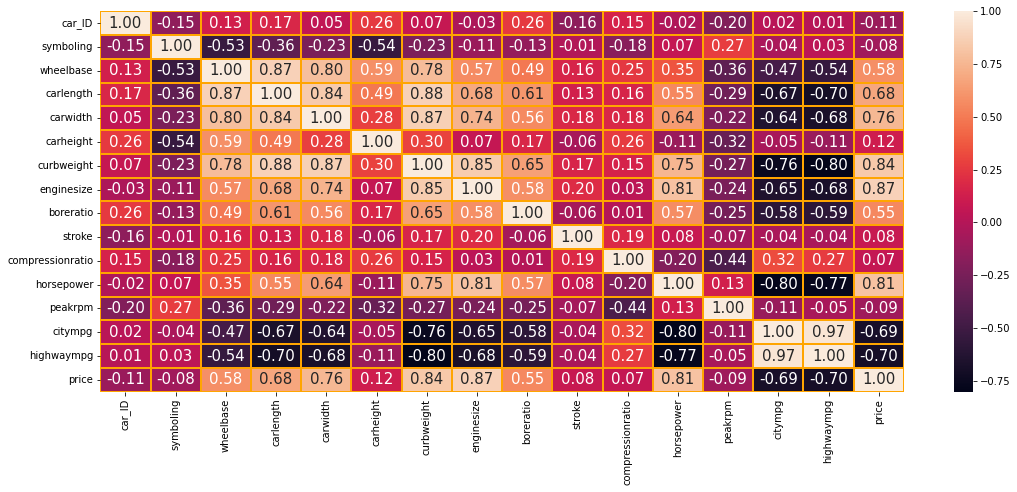

In [8]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

### Multicollinearity in features
* Some features are strongly correlated eg **carlength** and **[curbweight, engine_size]**.

## Univariate Analysis

In [9]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [10]:
num_cols.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
cat_cols.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

#### Numerical Variables

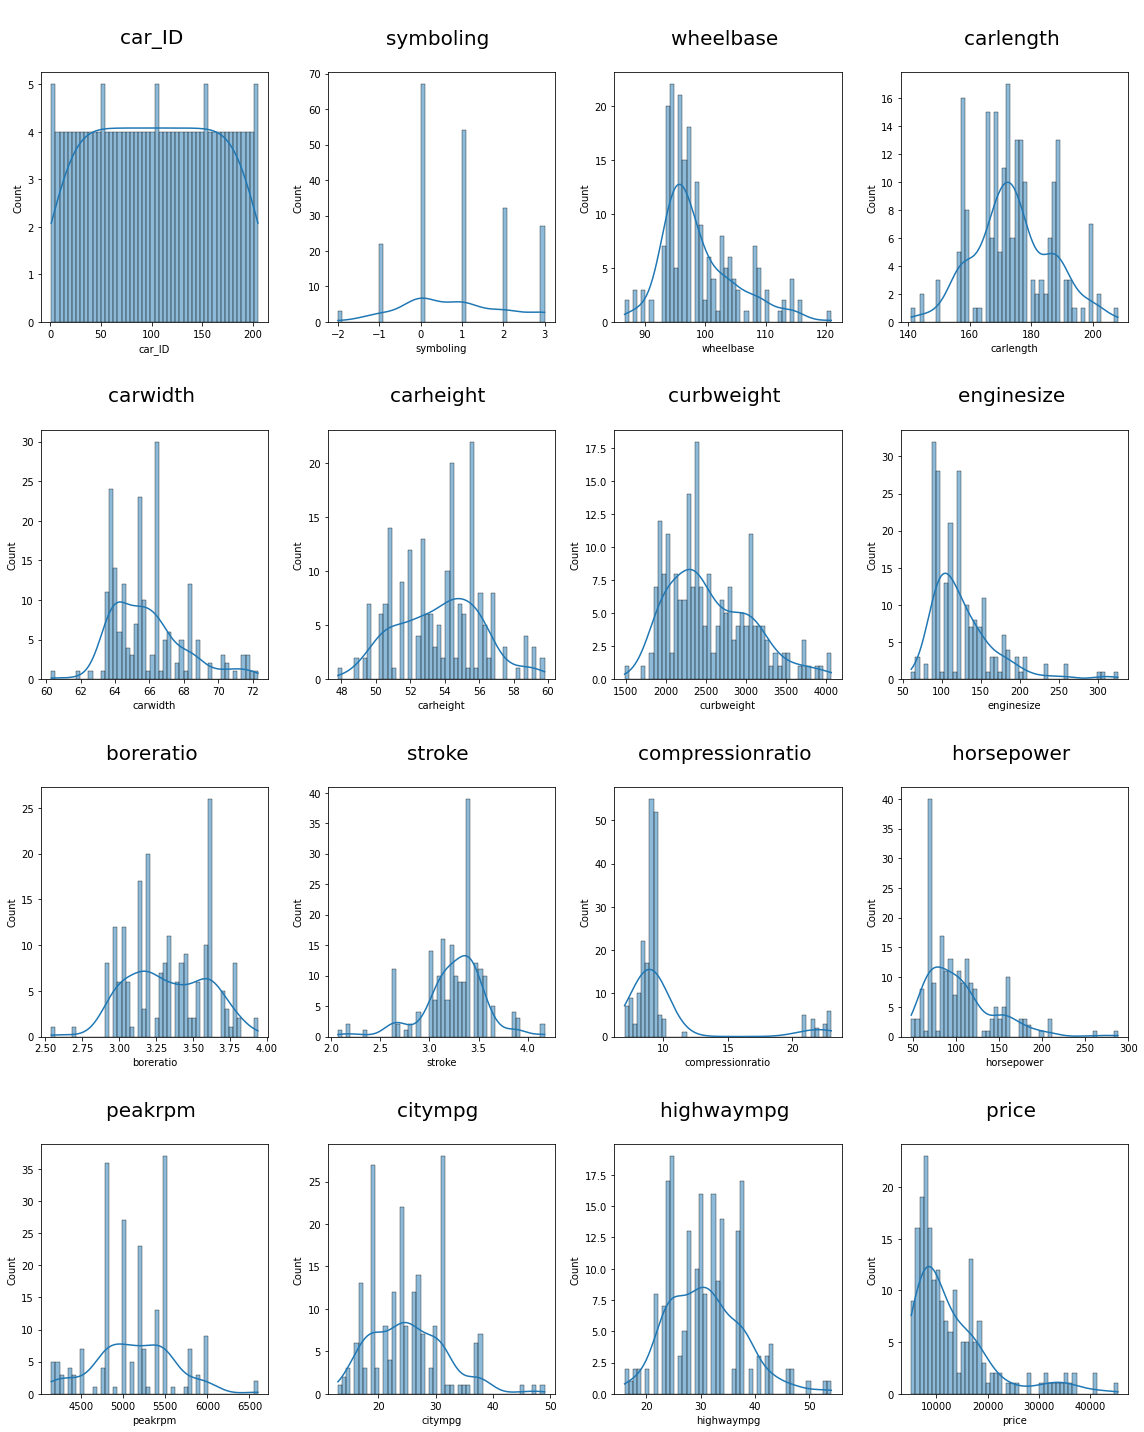

In [12]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

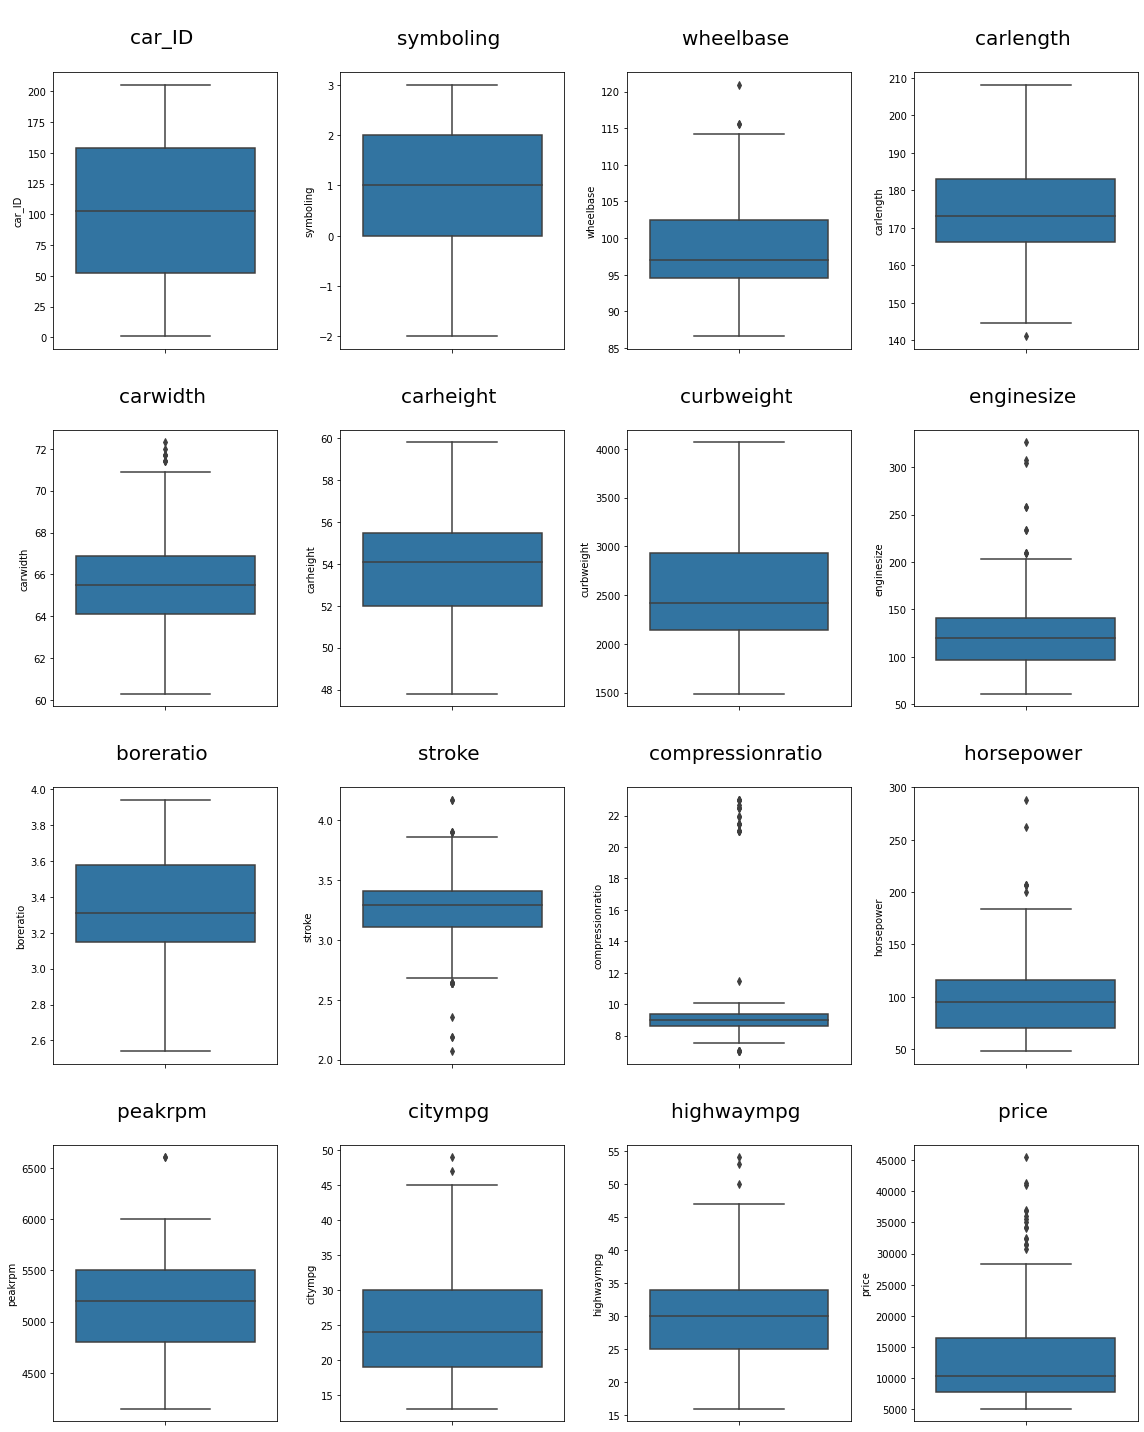

In [13]:
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Deal with outliers

##### Categorical Variables

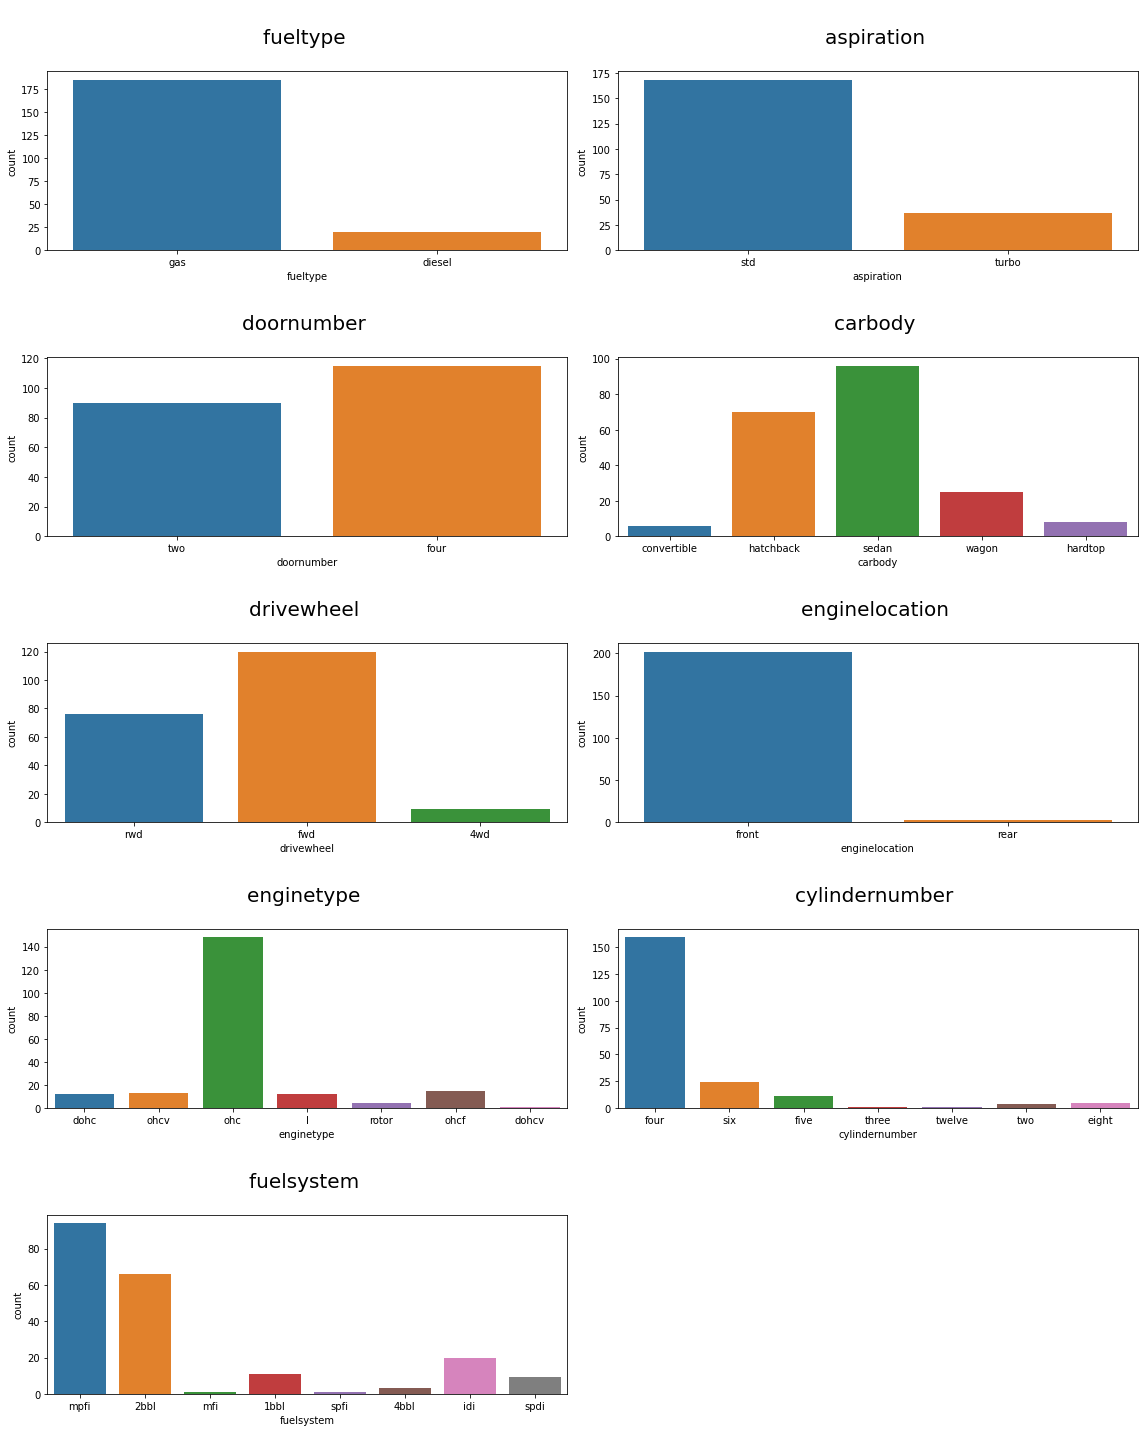

In [14]:
cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Fuel Types

In [15]:
fueltype = df['fueltype'].value_counts().reset_index()
fueltype.columns = ['fueltype', 'value_counts']
fig = px.pie(fueltype, names = 'fueltype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

#### Aspiration

In [16]:
aspiration = df['aspiration'].value_counts().reset_index()
aspiration.columns = ['aspiration', 'value_counts']
fig = px.pie(aspiration, names = 'aspiration', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

### ... Do more Univarite Analysis

## Bivariate & Multivariate Analysis

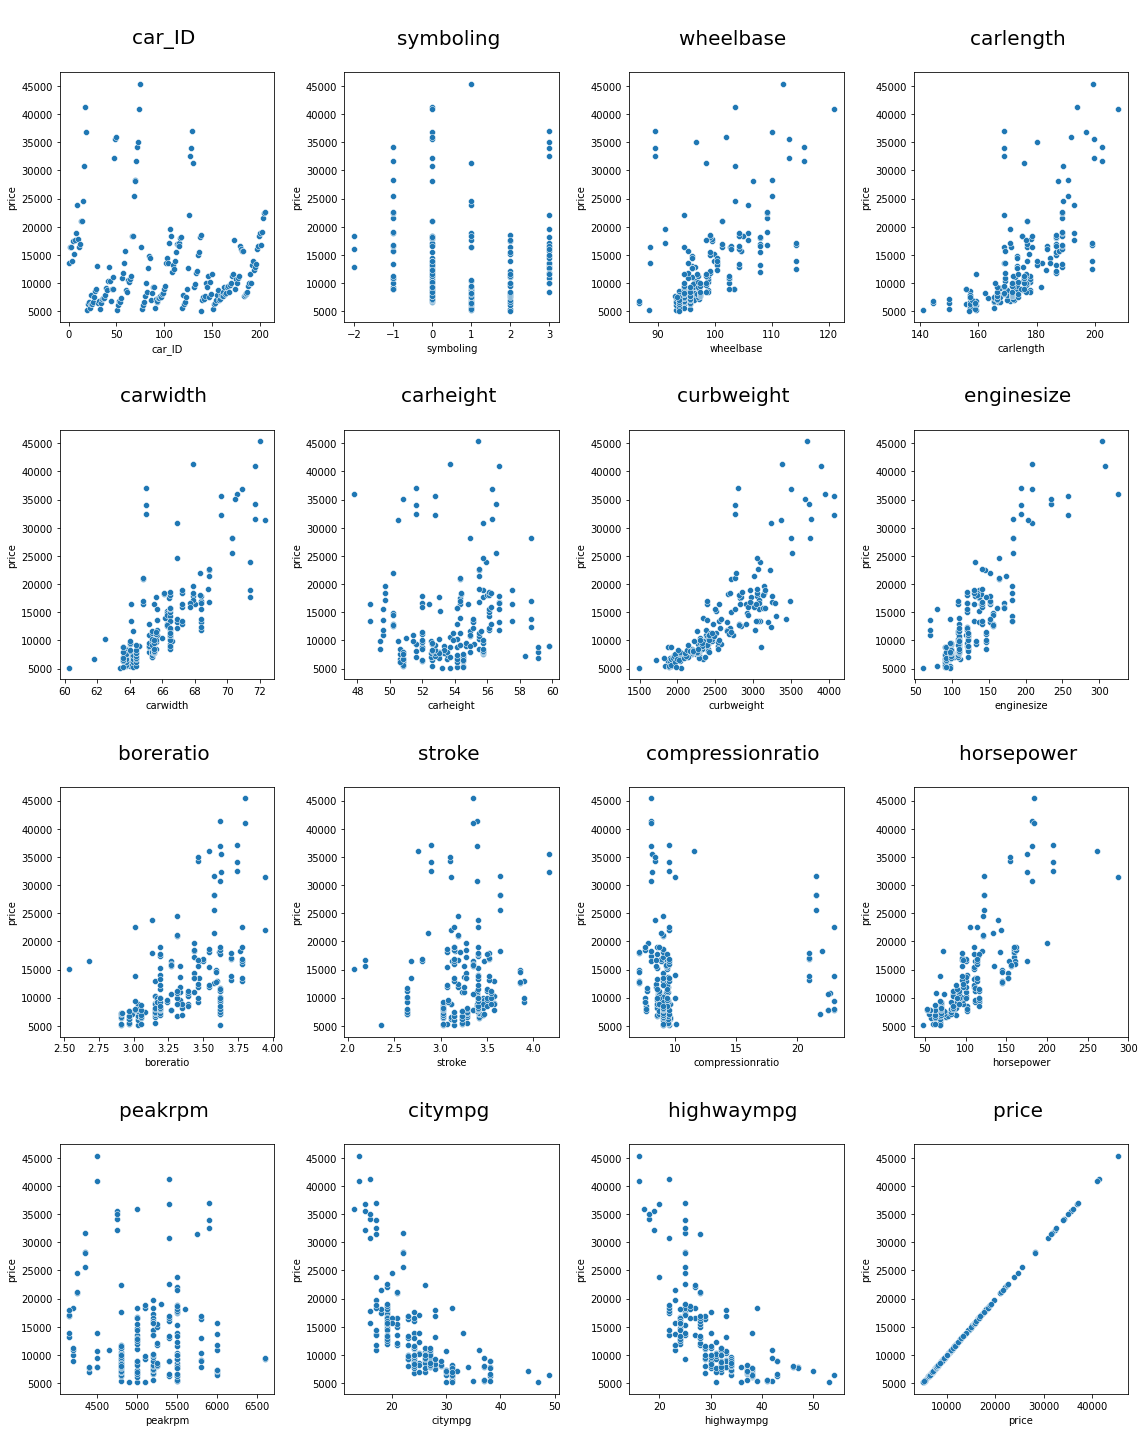

In [17]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

* if wheelbase of car is increasing than the price is also increasing.
* Price is increasing with car length and car width.
* Heavy cars has higher price.
* Cars having powerful engine are having high prices.
* Cars with lower mpg are costly.

#### Extracting companies names

In [18]:
 df['CarName'] = df['CarName'].str.split(' ', expand = True)[0]

In [19]:
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [21]:
# handling duplicate values 

df['CarName'] = df['CarName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})

In [22]:
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

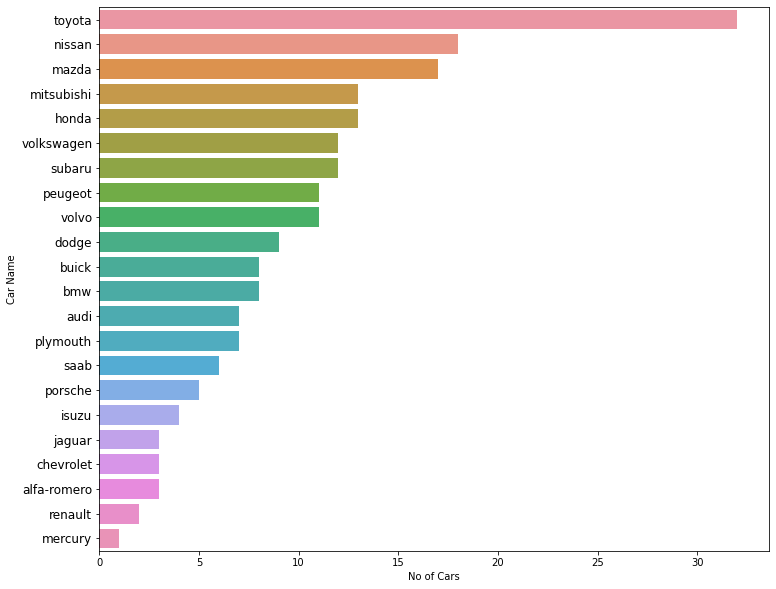

In [23]:
df1 = pd.DataFrame(df['CarName'].value_counts().reset_index())
df1.columns = ['Car Name', 'No of Cars']

plt.figure(figsize = (12, 10))
sns.barplot(x = 'No of Cars', y = 'Car Name', data = df1)
plt.yticks(size = 12)
plt.show()

In [24]:
px.scatter(data_frame = df, x = 'carlength', y = 'price', color = 'carbody')

#### ... Do more bivariate & multivariate analysis

## Data Preprocessing

In [25]:
df.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

   ... stroke compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0  ...   2.68              9.0         111     5000       21          27   
1  ...   2.68              9.0         111     5000       21          27   
2  ...   3.47              9.0         154     5000       19          26   
3  ...   3.40             10.0         102     5500       24          30   
4  ...   3.40              8.0         115     5500       18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

#### Drop unnecessary columns

In [26]:
df.drop(columns = ['car_ID'], axis = 1, inplace = True)

#### Encoding Ordinal Variables

In [27]:
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

#### Split our predictor variables from target variable.

In [28]:
X = df.drop(columns = 'price', axis = 1)
y = df['price']

#### Encoding Nominal Variables

In [29]:
X = pd.get_dummies(X, drop_first = True)
X.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  ...  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0        2548  ...                0                0               0   
1        2548  ...                0                0               0   
2        2823  ...                0                0               0   
3        2337  ...                0                0               0   
4        2824  ...                0                0               0   

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
0               0                1                0                0  
1               0                1                0                0  
2               0                1                0                0  
3               0                1                0                0  
4               0                1                0                0  

[5 rows x 59 columns]

#### Split Traing and testing data

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#### Scale the Data

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Modelling

In [34]:
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [36]:
lr = LinearRegression()
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
rfr = RandomForestRegressor()
ada = AdaBoostRegressor(base_estimator = rfr)
gbr = GradientBoostingRegressor()
xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)

In [37]:
models = {
    "linear": lr,
    "lasso": lassocv,
    "ada": ada,
    "forest": rfr,
    "gradient": gbr,
    "xg": xgb
}

In [39]:
for k, v in models.items():
    v.fit(X_train, y_train)
    print(f"{k}-Training: {v.score(X_train, y_train)}")
    print(f"{k}-Testing: {v.score(X_test, y_test)}")
    print("\n")
    print("---------------------")
    print("\n")

linear-Training: 0.9743361899011469
linear-Testing: 0.8964031255802521


---------------------




C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 



lasso-Training: 0.9717216921777231
lasso-Testing: 0.8574290460316626


---------------------


ada-Training: 0.9919905491238722
ada-Testing: 0.9112643340378971


---------------------


forest-Training: 0.9884791645393451
forest-Testing: 0.9086362916851191


---------------------


gradient-Training: 0.9936871712309413
gradient-Testing: 0.9002236622851684


---------------------


xg-Training: 0.9985235166284753
xg-Testing: 0.9044995417046205


---------------------




In [44]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost'],
    'Score' : [lr.score(X_test, y_test), lassocv.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test)]
})

models.sort_values(by = 'Score', ascending = False).reset_index(drop=True)

Model     Score
0          Ada Boost  0.911264
1      Random Forest  0.908636
2            XgBoost  0.904500
3     Gradient Boost  0.900224
4  Linear Regression  0.896403
5   Lasso Regression  0.857429

In [45]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

## To improve on these models, you can do some feature selection and hyperparameter tuning

# END